# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [13]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## Regression Model Evaluation

In [15]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [16]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [17]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [19]:
# Your code here :
# Define variables
X = data.drop('MEDV', axis=1) # Input variables
y = data['MEDV'] # target variable (which we want to predict)

# Split the data into training and testing sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print split data shapes
print("Training data shape (X_train):", X_train.shape)
print("Test Data Shape (X_test):", X_test.shape)
print("Target shape (y_train):", y_train.shape)
print("Target shape of test (y_test):", y_test.shape)

Training data shape (X_train): (404, 13)
Test Data Shape (X_test): (102, 13)
Target shape (y_train): (404,)
Target shape of test (y_test): (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [25]:
# Your code here :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)
# Print some predictions from the training set
print("Examples of predictions for the training set:", train_predictions[:5])
print("Examples of predictions for the test set:", test_predictions[:5])

# Calculate the mean square error (MSE) for the training and test set
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R-squared for the training and test set
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"Mean square error of the training set: {train_mse:.2f}")
print(f"Mean square error of the test set: {test_mse:.2f}")
print(f"R-squared for the training set: {train_r2:.2f}")
print(f"R-squared for the test set: {test_r2:.2f}")

Examples of predictions for the training set: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]
Examples of predictions for the test set: [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]
Mean square error of the training set: 21.64
Mean square error of the test set: 24.29
R-squared for the training set: 0.75
R-squared for the test set: 0.67


## 3. Calculate and print R-squared for both the training and the testing set.

In [29]:
# Calculate R-squared for the training set
train_r2 = r2_score(y_train, train_predictions)

# Calculate R-squared for the test set
test_r2 = r2_score(y_test, test_predictions)

# Print the results
print(f"R-squared for the training set: {train_r2:.2f}")
print(f"R-squared for the test set: {test_r2:.2f}")

R-squared for the training set: 0.75
R-squared for the test set: 0.67


## 4. Calculate and print mean squared error for both the training and the testing set.

In [31]:
# Your code here :
from sklearn.metrics import mean_squared_error

# Calculate the mean square error of the training set
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate the mean square error of the test set
test_mse = mean_squared_error(y_test, test_predictions)

# Print the results
print(f"Mean square error of the training set: {train_mse:.2f}")
print(f"Mean square error of the test set: {test_mse:.2f}")

Mean square error of the training set: 21.64
Mean square error of the test set: 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [35]:
# Your code here :
from sklearn.metrics import mean_absolute_error

# Calculate the average absolute error of the training set
train_mae = mean_absolute_error(y_train, train_predictions)

# Calculate the average absolute error of the test set
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the results
print(f"Mean absolute error of the training set: {train_mae:.2f}")
print(f"Mean absolute error of the test set: {test_mae:.2f}")

Mean absolute error of the training set: 3.31
Mean absolute error of the test set: 3.19


## Classification Model Evaluation

In [38]:
from sklearn.datasets import load_iris
data = load_iris()

In [40]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [42]:
column_names = data.feature_names

In [44]:
df = pd.DataFrame(data['data'],columns=column_names)

In [46]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
target = pd.DataFrame(data.target)

In [50]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [52]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [54]:
# Define data and target
X = df. values
y = data. target

# Split the data into training (80%) and test (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to check
print(f"Training set shape X_train: {X_train.shape}")
print(f"Shape of test suite X_test: {X_test.shape}")

Training set shape X_train: (120, 4)
Shape of test suite X_test: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [58]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression(max_iter=200)

# Train the model on the training set
logreg.fit(X_train, y_train)

# Generate predictions for the training set
train_predictions = logreg.predict(X_train)

# Generate predictions for the test set
test_predictions = logreg.predict(X_test)

# Print some predictions for the training and test set
print("Training set predictions:", train_predictions[:5])
print("Test set predictions:", test_predictions[:5])

Training set predictions: [0 0 1 0 0]
Test set predictions: [1 0 2 1 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [60]:
from sklearn.metrics import accuracy_score

# Calculate model accuracy for the training set
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate the model accuracy for the test set
test_accuracy = accuracy_score(y_test, test_predictions)

# Print accuracy for the training and test sets
print(f"Model accuracy for training set: {train_accuracy:.2f}")
print(f"Model accuracy for the test set: {test_accuracy:.2f}")

Model accuracy for training set: 0.97
Model accuracy for the test set: 1.00


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [62]:
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy for the training set
train_balanced_accuracy = balanced_accuracy_score(y_train, train_predictions)

# Calculate the balanced accuracy of the test set
test_balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Print balanced accuracy for the training and test sets
print(f"Balanced accuracy of training set: {train_balanced_accuracy:.2f}")
print(f"Balanced accuracy of the test suite: {test_balanced_accuracy:.2f}")

Balanced accuracy of training set: 0.98
Balanced accuracy of the test suite: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [64]:
# Your code here :
from sklearn.metrics import precision_score

# Calculate model accuracy for the training set
train_precision = precision_score(y_train, train_predictions, average='weighted')

# Calculate model accuracy for the test set
test_precision = precision_score(y_test, test_predictions, average='weighted')

# Print the model accuracy for the training and test sets
print(f"Model precision for training set: {train_precision:.2f}")
print(f"Precision of the test set: {test_precision:.2f}")

Model precision for training set: 0.98
Precision of the test set: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [70]:
# Calculate the recall score for the training set
train_recall = recall_score(y_train, train_predictions, average='weighted')

# Calculate the recall score for the test set
test_recall = recall_score(y_test, test_predictions, average='weighted')

# Print the recall score for the training and test sets
print(f"Recall score for training set: {train_recall:.2f}")
print(f"Recall score for the test set: {test_recall:.2f}")

Recall score for training set: 0.97
Recall score for the test set: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [74]:
# Your code here :
from sklearn.metrics import f1_score

# Calculate the F1 score for the training set
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Calculate the F1 score for the test set
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Print the F1 score for the training and test sets
print(f"F1 score of training set: {train_f1:.2f}")
print(f"F1 score of the test set: {test_f1:.2f}")

F1 score of training set: 0.97
F1 score of the test set: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

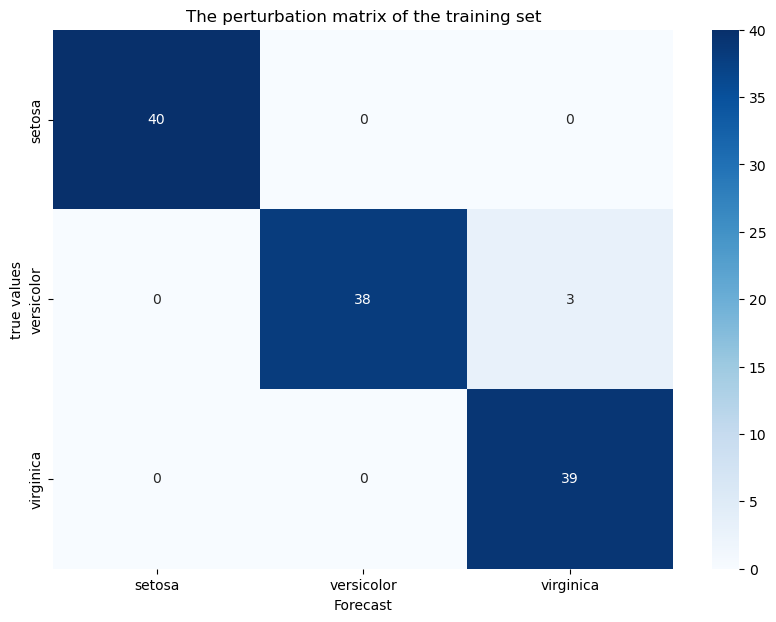

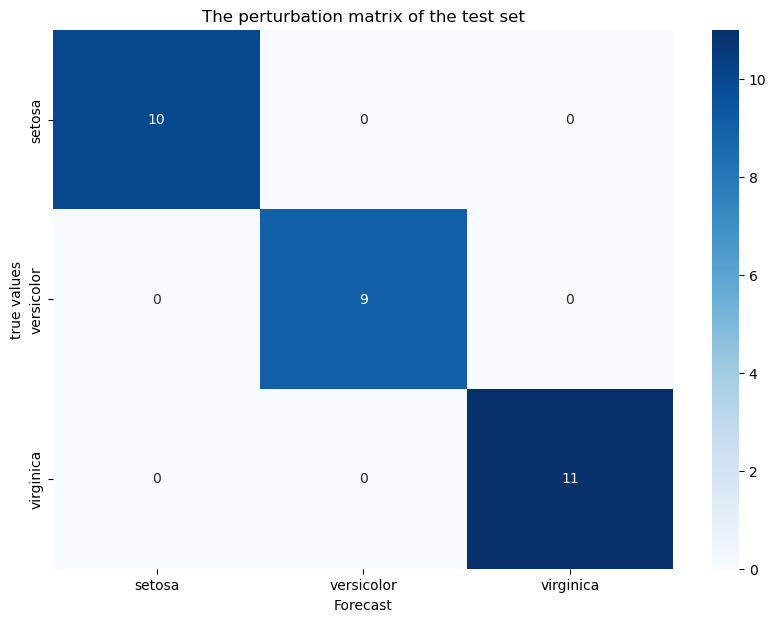

In [78]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the confusion matrix for the training set
train_cm = confusion_matrix(y_train, train_predictions)

# Calculate the confusion matrix for the test set
test_cm = confusion_matrix(y_test, test_predictions)

# Draw the confusion matrix for the training set
plt.figure(figsize=(10, 7))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title('The perturbation matrix of the training set')
plt.xlabel('Forecast')
plt.ylabel('true values')
plt.show()

# Draw the confusion matrix for the test set
plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title('The perturbation matrix of the test set')
plt.xlabel('Forecast')
plt.ylabel('true values')
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [80]:
# Have fun here !
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Prediction on training and test sets
train_predictions_knn = knn_model.predict(X_train)
test_predictions_knn = knn_model.predict(X_test)

# Calculate evaluation metrics for the KNN model
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
print("KNN Training Accuracy: ", accuracy_score(y_train, train_predictions_knn))
print("KNN Testing Accuracy: ", accuracy_score(y_test, test_predictions_knn))

print("KNN Training Balanced Accuracy: ", balanced_accuracy_score(y_train, train_predictions_knn))
print("KNN Testing Balanced Accuracy: ", balanced_accuracy_score(y_test, test_predictions_knn))

print("KNN Training Precision: ", precision_score(y_train, train_predictions_knn, average='macro'))
print("KNN Testing Precision: ", precision_score(y_test, test_predictions_knn, average='macro'))

print("KNN Training Recall: ", recall_score(y_train, train_predictions_knn, average='macro'))
print("KNN Testing Recall: ", recall_score(y_test, test_predictions_knn, average='macro'))

print("KNN Training F1 Score: ", f1_score(y_train, train_predictions_knn, average='macro'))
print("KNN Testing F1 Score: ", f1_score(y_test, test_predictions_knn, average='macro'))

KNN Training Accuracy:  0.95
KNN Testing Accuracy:  1.0
KNN Training Balanced Accuracy:  0.9499687304565354
KNN Testing Balanced Accuracy:  1.0
KNN Training Precision:  0.9499687304565354
KNN Testing Precision:  1.0
KNN Training Recall:  0.9499687304565354
KNN Testing Recall:  1.0
KNN Training F1 Score:  0.9499687304565354
KNN Testing F1 Score:  1.0
